In [10]:
import pandas as pd

# Load cleaned datasets
df_benin = pd.read_csv("data/benin_clean.csv")
df_sierra = pd.read_csv("data/sierraleone_clean.csv")
df_togo = pd.read_csv("data/togo_clean.csv")

# Optional: add a column to identify country
df_benin['Country'] = 'Benin'
df_sierra['Country'] = 'Sierra Leone'
df_togo['Country'] = 'Togo'

# Combine into one dataframe
df_all = pd.concat([df_benin, df_sierra, df_togo], ignore_index=True)



C:\Users\It's Blue\AppData\Local\Temp\ipykernel_37384\290084334.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')


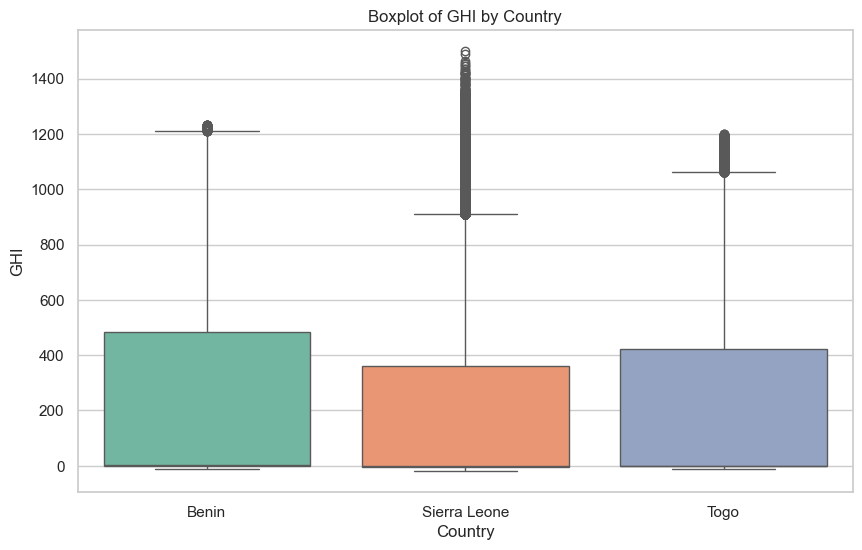

C:\Users\It's Blue\AppData\Local\Temp\ipykernel_37384\290084334.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')


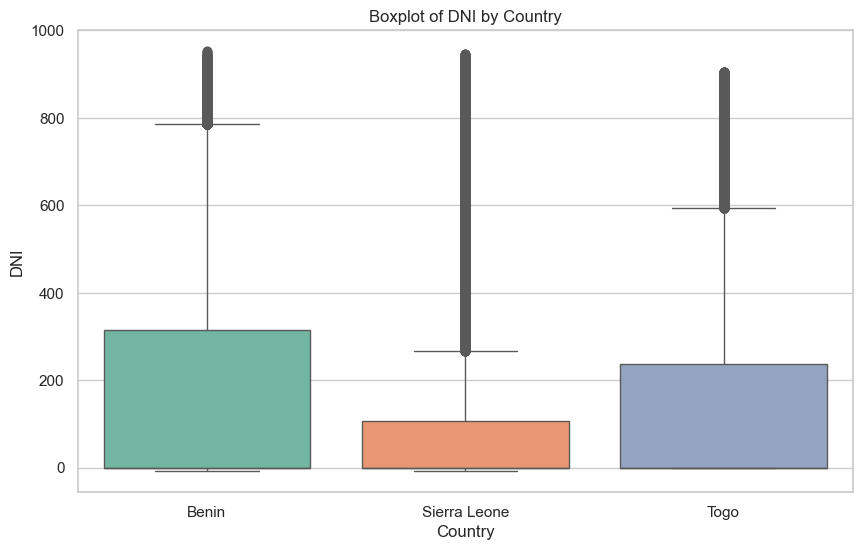

C:\Users\It's Blue\AppData\Local\Temp\ipykernel_37384\290084334.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')


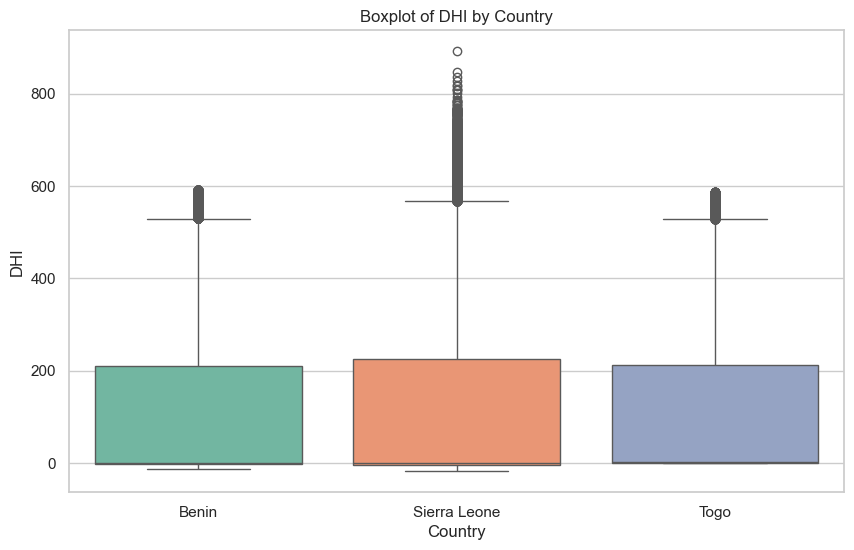

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')
    plt.title(f'Boxplot of {metric} by Country')
    plt.ylabel(metric)
    plt.xlabel('Country')
    plt.show()


In [12]:
summary = df_all.groupby('Country')[metrics].agg(['mean','median','std'])
summary


GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         240.342811    1.8  330.868308  167.187516   -0.1  261.710501   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          223.859675    0.5  317.306277  147.975931    0.0  247.683690   

                     DHI                     
                    mean median         std  
Country                                      
Benin         110.899160    0.5  152.922463  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          112.781249    1.5  151.571744

In [13]:
from scipy.stats import f_oneway, kruskal

# One-way ANOVA for GHI
f_val, p_val = f_oneway(df_benin['GHI'], df_sierra['GHI'], df_togo['GHI'])
print(f"ANOVA F-statistic: {f_val:.2f}, p-value: {p_val:.4f}")

# If data is not normally distributed, use Kruskal-Wallis
h_val, p_val_kruskal = kruskal(df_benin['GHI'], df_sierra['GHI'], df_togo['GHI'])
print(f"Kruskal-Wallis H-statistic: {h_val:.2f}, p-value: {p_val_kruskal:.4f}")


ANOVA F-statistic: 1953.75, p-value: 0.0000
Kruskal-Wallis H-statistic: 3826.16, p-value: 0.0000


C:\Users\It's Blue\AppData\Local\Temp\ipykernel_37384\1541129247.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='Set3')


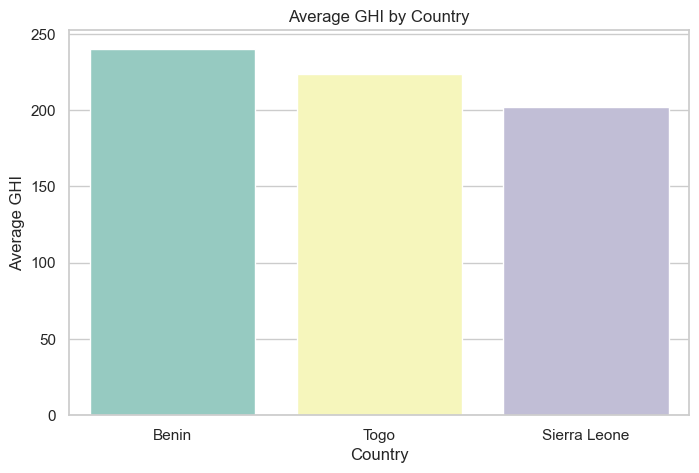

In [14]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='Set3')
plt.title('Average GHI by Country')
plt.ylabel('Average GHI')
plt.show()
